In [1]:
import sys 
import os

if 'fast_shapelets' not in [el.split('/')[-1] for el in sys.path]:
    curr_path = os.getcwd()
    sys.path.append('/'.join((curr_path.split('/')[:-1])))




In [ ]:
!git clone -b jax https://github.com/g0bel1n/fast_shapelets.git

fatal: destination path 'fast_shapelets' already exists and is not an empty directory.


In [3]:
cd fast_shapelets

/content/fast_shapelets


In [50]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), 367 bytes | 183.00 KiB/s, done.
From https://github.com/g0bel1n/fast_shapelets
   bb32ac3..d7c8579  jax        -> origin/jax
Updating bb32ac3..d7c8579
Fast-forward
 src/_fast_shapelet.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [4]:
from src import get_dataset, FastShapelets
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [5]:
X_train,y_train, X_test, y_test = get_dataset('StarLightCurves')
y_train = y_train-1
y_test = y_test-1

X = X_train[:1000]
y = y_train[:1000]

Dataset StarLightCurves loading from cache 



# Binary classification

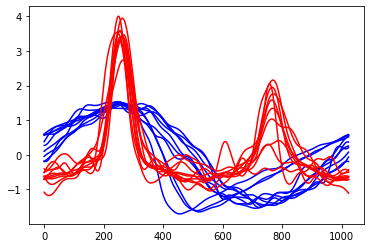

In [74]:
class_0 = X_train[np.where(y_train==0)][:10]
class_2 = X_train[np.where(y_train==1)][:10]
for el in class_0:
  plt.plot(el,color='b')
for el in class_2:
  plt.plot(el,color='r')


In [75]:
X_bin = np.vstack((X_train[np.where(y_train==0)][:10],X_train[np.where(y_train==1)][:10]))
y_bin = np.hstack((np.zeros(10),np.ones(10)))

In [76]:
fs = FastShapelets(min_shapelet_length=200, max_shapelet_length=210, cardinality=4, dimensionality=16, r=10)

In [77]:
fs.fit(X_bin, y_bin)

Output()

Computing all shapelets...

Computing shapelet 1/11

Computing collision table...

Computing shapelet 2/11

Computing collision table...

Computing shapelet 3/11

Computing collision table...

Computing shapelet 4/11

Computing collision table...

Computing shapelet 5/11

Computing collision table...

Computing shapelet 6/11

Computing collision table...

Computing shapelet 7/11

Computing collision table...

Computing shapelet 8/11

Computing collision table...

Computing shapelet 9/11

Computing collision table...

Computing shapelet 10/11

Computing collision table...

Computing shapelet 11/11

Computing collision table...

In [98]:
test_shap = fs.transform(np.vstack((X_test[np.where(y_test==0)],X_test[np.where(y_test==1)])))
train_shap = fs.transform(np.vstack((X_train[np.where(y_train==0)][:10],X_train[np.where(y_train==1)][:10])))

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_shap, np.hstack((np.zeros(10),np.ones(10))))
knn.score(test_shap,np.hstack((np.zeros(1177),np.ones(2305))))
#balanced_accuracy_score(y_test[:1000], knn.predict(test_shap))

0.9928202182653647

0.929350947731189


[Text(0.5, 0.75, 'x[7] <= 0.896\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

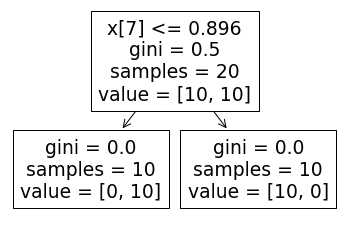

In [108]:
from sklearn import tree
Dtree = DecisionTreeClassifier(max_depth=1)
Dtree.fit(train_shap, np.hstack((np.zeros(10),np.ones(10))))
print(Dtree.score(test_shap,np.hstack((np.zeros(1177),np.ones(2305)))))
tree.plot_tree(Dtree)

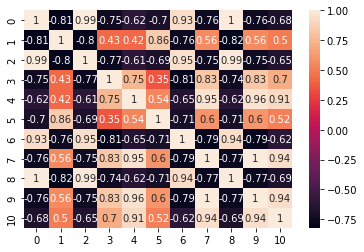

In [93]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

train_features_df = pd.DataFrame(train_shap)

corr_matrix = train_features_df.corr()
sn.heatmap(corr_matrix,annot=True)
plt.show()

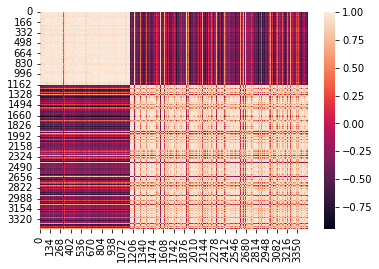

In [110]:
ind_df = pd.DataFrame(test_shap.T)

corr_ind = ind_df.corr()
sn.heatmap(corr_ind)
plt.show()

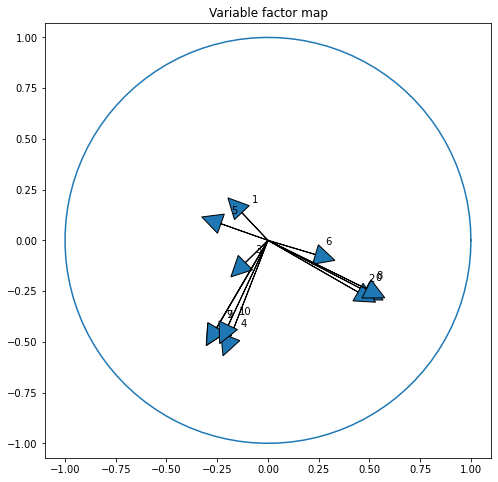

In [95]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
 
df = train_features_df
 
n_components = 11
 
# Do the PCA.
pca = PCA(n_components=n_components)
pca.fit_transform(df)


# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

In [43]:
print([fs.shapelets[k].gain for k in fs.shapelets.keys()])

[-0.014378460478078753, 0.0, 0.0, -0.009668627400105434, 0.0, 0.0, -0.014378460478078753, -0.051899160321315474, -0.051899160321315474, -0.051899160321315474, -0.034851554559677145]


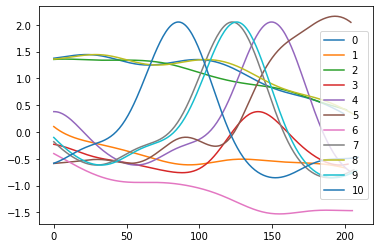

In [84]:
for i,k in enumerate(fs.shapelets.keys()):
  plt.plot(fs.shapelets[k].value,label=str(i))
  plt.legend()

# Stability

Output()

Computing all shapelets...

Computing shapelet 1/1

Computing collision table...

Output()

Computing all shapelets...

Computing shapelet 1/1

Computing collision table...

Output()

Computing all shapelets...

Computing shapelet 1/1

Computing collision table...

Output()

Computing all shapelets...

Computing shapelet 1/1

Computing collision table...

Output()

Computing all shapelets...

Computing shapelet 1/1

Computing collision table...

Output()

Computing all shapelets...

Computing shapelet 1/1

Computing collision table...

Output()

Computing all shapelets...

Computing shapelet 1/1

Computing collision table...

Output()

Computing all shapelets...

Computing shapelet 1/1

Computing collision table...

Output()

Computing all shapelets...

Computing shapelet 1/1

Computing collision table...

Output()

Computing all shapelets...

Computing shapelet 1/1

Computing collision table...

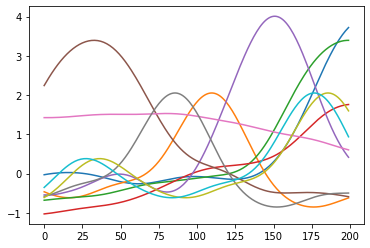

In [111]:
for k in range(10):
  fs = FastShapelets(min_shapelet_length=200, max_shapelet_length=200, cardinality=4, dimensionality=16, r=10)
  fs.fit(X_bin,y_bin)
  plt.plot(fs.shapelets[200].value,label=str(k))

# 3 class

In [29]:

X = np.vstack((X_train[np.where(y_train==0)][:20],X_train[np.where(y_train==1)][:20],X_train[np.where(y_train==2)][:20]))
y = np.hstack((np.zeros(20),np.ones(20),2*np.ones(20)))

In [30]:
fs = FastShapelets(min_shapelet_length=200, max_shapelet_length=201, cardinality=4, dimensionality=16, r=10)

In [39]:
fs.fit(X,y)

Output()

Computing all shapelets...

Computing shapelet 1/2

Computing collision table...

Computing shapelet 2/2

Computing collision table...

In [41]:
test_shap = fs.transform( np.vstack((X_test[np.where(y_test==0)][:200],X_test[np.where(y_test==1)][:200],X_test[np.where(y_test==2)][:200])))
train_shap = fs.transform( np.vstack((X_train[np.where(y_train==0)][:20],X_train[np.where(y_train==1)][:20],X_train[np.where(y_train==2)][:20])))

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_shap, np.hstack((np.zeros(20),np.ones(20),2*np.ones(20))))
knn.score(test_shap,np.hstack((np.zeros(200),np.ones(200),2*np.ones(200))))
#balanced_accuracy_score(y_test[:1000], knn.predict(test_shap))

0.735

Confusion matrix, without normalization
[[118   0  82]
 [  0 186  14]
 [ 62   1 137]]
Normalized confusion matrix
[[0.59  0.    0.41 ]
 [0.    0.93  0.07 ]
 [0.31  0.005 0.685]]


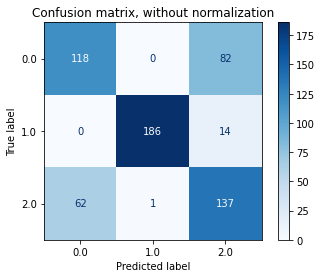

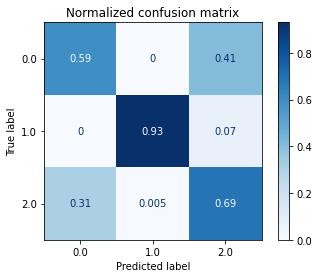

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        test_shap,
        np.hstack((np.zeros(200),np.ones(200),2*np.ones(200))),
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


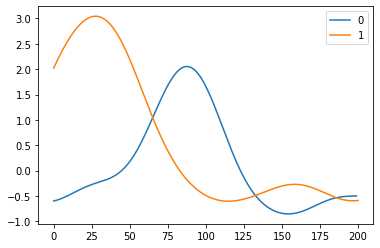

In [40]:
for i,k in enumerate(fs.shapelets.keys()):
  plt.plot(fs.shapelets[k].value,label=str(i))
  plt.legend()

In [ ]:
from sklearn import tree
Dtree = DecisionTreeClassifier(max_depth=2)
Dtree.fit(train_shap, np.hstack((np.zeros(10),np.ones(10))))
print(Dtree.score(test_shap,np.hstack((np.zeros(1177),np.ones(2305)))))
tree.plot_tree(Dtree)